In [1]:
from IPython.display import Markdown, display
display(Markdown(open("./SM_header.md", "r").read()))

Copyright © 2025 Université Paris Cité

Author: [Guillaume Rousseau](https://www.linkedin.com/in/grouss/), Department of Physics, Paris, France (email: guillaume.rousseau@u-paris.fr)

This archive contains the supplemental materials and replication package associated with the preprint, "*Temporal and topological partitioning in real-world growing networks for scale-free properties study*", available on [arXiv](https://arxiv.org/abs/2501.10145) and [ssrn](http://ssrn.com/abstract=5191689).

**The latest version of the preprint (timestamped arXiv:2501.10145v2) is downloadable here https://arxiv.org/pdf/2501.10145v2**

The current version of the Python scripts and associated resources is available on the [author's GitHub page](https://github.com/grouss/growing-network-study).

This work is currently licensed under the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0).

To give appropriate credit and cite this work ([BibTeX entry](./rousseau2025temporal)):
Rousseau, G. (2025). *Temporal and topological partitioning in real-world growing networks for scale-free properties study* [Preprint]. arXiv:2501.10145. https://arxiv.org/abs/2501.10145; also available on SSRN: http://ssrn.com/abstract=5191689

 
# A) Replication Packages

[Open the Replication Package notebook related to the datasets.](./Replication_Package_Datasets.ipynb)

[Open the Replication Package notebook related to the figures.](./Replication_Package_Figures.ipynb)

# B) QuickStart Guide

[Open the QuickStart Guide notebook](./SM00_QuickStart.ipynb)

# C) Table of Contents

- 1. [Function Definitions](./SM01_Functions.ipynb)
- 2. [Dataset Import](./SM02_DatasetImport.ipynb)
- 3. [Building the Transposed Graph](./SM03_BuildingTransposedGraph.ipynb)
- 4. [Temporal Information Quality and Summary Statistics](./SM04_TemporalInformationMainStats.ipynb)
- 5. [Growth Relationship Between Nodes and Edges](./SM05_GrowingRules.ipynb)
- 6. [Topological Partitioning($RV$ Nodes)](./SM06_TopologicalPartitioning.ipynb)
- 7. [In-Degree and Out-Degree Distributions Over Time](./SM07_DegreeDistributionOverTime.ipynb)
- 8. [Distribution Tail Analysis](./SM08_DistributionTailAnalysis.ipynb)
- 9. [Temporal Partitioning](./SM09_TemporalPartitioning.ipynb)
- 10. [Derived $O-(RV/RL)-O$ Graph Construction](./SM10_DerivedGrowingNetwork.ipynb)
- 11. [Building the $TSL$ Partitioning](./SM11_TSLPartitioning.ipynb)
- 12. [Barabási–Albert Model Use Case](./SM12_BarabasiAlbertUseCase.ipynb)


**NB :** As of 2025/05/16, the QuickStart guide, the replication packages, and SM01 to SM12 are available. The Python scripts are also provided under `local_utils` directory, but they are not in their final form and should be considered an alpha release. The graph datasets used in the study are available in a distinct Zenodo Deposit 10.5281/zenodo.15260640 ($\sim50$ Go), including the main dataset $O/RV/RL-O/RV/RL$ (2+ billions of nodes, $\sim4$ billions of edges), and two derived $O-(RV/RL)-O$ graphs ($\sim150$ millions nodes and edges). 

More release notes are available in the [dedicated notebook](./SM_ReleaseNote.ipynb).

In [3]:
%load_ext autoreload
%autoreload 2

import importlib,sys,local_utils
from local_utils import *

print("___ Import data from graphpath=",config.graphpath)
print("___ Export data to exportpath=",config.exportpath)   
DisplayCopyrightInfo()

___ Import data from graphpath= ./ImportData/
___ Export data to exportpath= ./ExportData/
--------------------------------------------------------------------------------
Copyright 2025 Université Paris Cité, France 
Author: Guillaume Rousseau, Physics Department, Paris, France 

(https://www.linkedin.com/in/grouss/)

This archive contains the supplemental materials and replication package associated with the preprint available on :
- arXiv (https://arxiv.org/abs/2501.10145)
- SSRN  (http://ssrn.com/abstract=5191689

Current version of python scripts and associated ressources are available on author's github page
(https://github.com/grouss/growing-network-study)

This work is currently licensed under CC BY-NC-SA 4.0
(https://creativecommons.org/licenses/by-nc-sa/4.0)
--------------------------------------------------------------------------------



# Replication Package (Figures)

This notebook generates and saves the figures presented in the latest verion of the article reporting the study results, available on [arXiv](https://arxiv.org/abs/2501.10145)

## a) SWH Dataset (Fig. #1) 

This figure was created using PowerPoint.  
The PowerPoint source file is available [here (PPT)](./ImportData/graph_dataset_bowtie_20250516.pptx).  
The image file is available [here (PNG)](./ImportData/SWH_dataset.png).

![Figure 1](./ImportData/SWH_dataset.png)

**Caption** : Graph representation of the SWH network, where $nodes$ represent software versions ($releases$/$revisions$) and artifacts produced by projects across various $origins$/$forges$.  Developers can act as $authors$ and/or $committers$ within these projects.  Release and revision nodes include native temporal attributes linked to committer or author dates. Edge directions follows multilayer rules, and may depend on nodes' intrinsic identifiers.

## b) New nodes and new edges over time (Fig. #2)

This figure was created using a python script.  

![Figure 2](./ImportData/Figures/Nodes_Edges_1970_2030.png )

**Caption** : New nodes (TOP) and edges (BOTTOM) per month by type ($RV$: revision, $RL$: release) from 1970 to 2030 in the SWH dataset (exported March 2021, dashed line). Exponential growth is noted, except for $RL$ nodes, and associated edges, with a constant rate since early 2014 (third dotted line). Existence of $RL>RL$ edges align with the adoption of $git$ and the launch of $github.com$ in 2008 (first dotted line). Plain vertical lines indicate January 1st of each year from 2017 to 2021. Anomalies at the end of 2017 and 15 months before export, suggest bias due to SWH crawling policies. Post-export nodes highlight temporal data issues (see Supplemental Material).


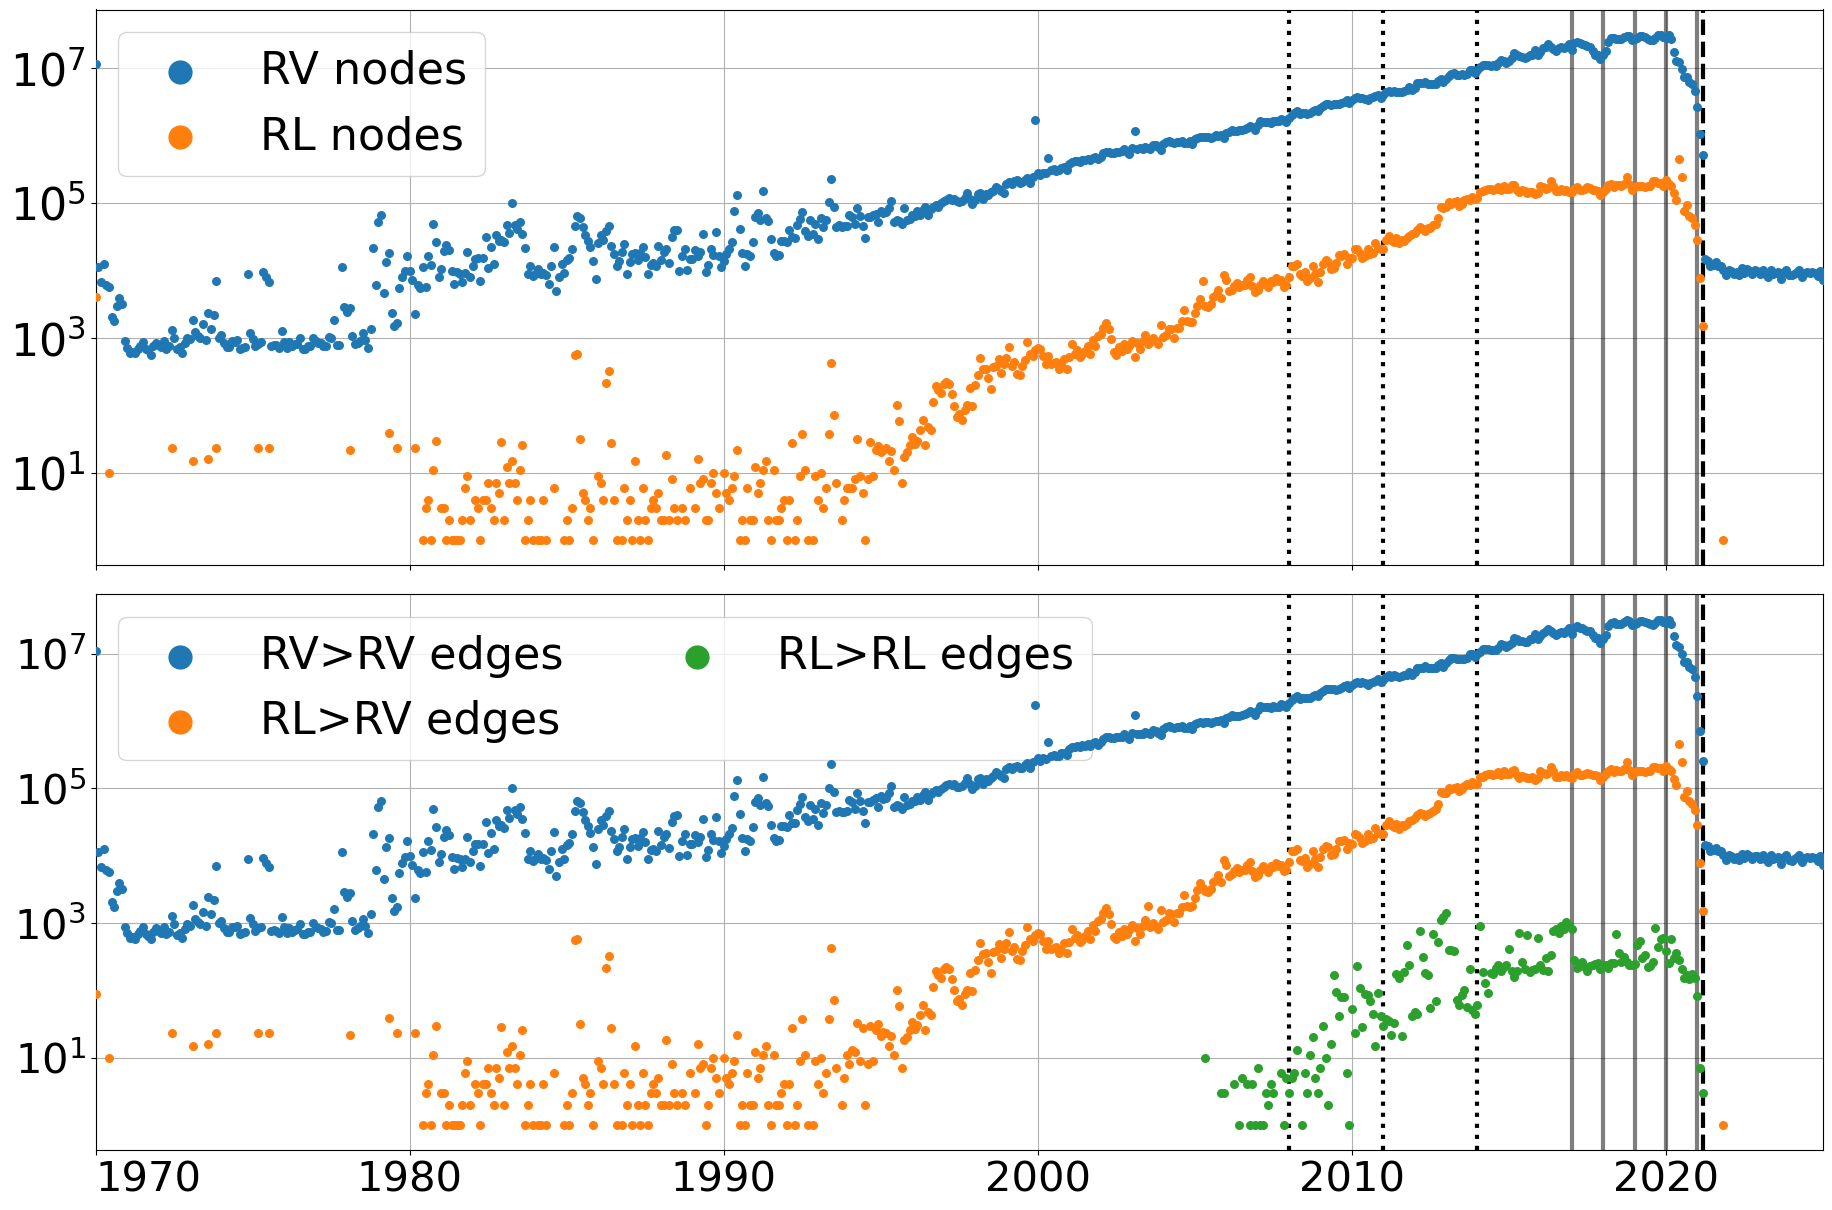

In [156]:
# python script
# ! image is saved in exportpath

Rebuild=True
Fsave=True
if Rebuild:
    stat=pickle.load(open(exportpath+"/stat_nodes_edges_1970_2030_20240517.pkl","rb"))

    nfig=2
    fontsize=32

    def verticalline(fig,axs):
            alpha=0.5
            lw=3
            for year in range(2017,2022):
                axs.axvline(x=year,color='k',alpha=alpha,lw=lw)
            axs.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
            for year in [2008,2011,2014]:
                axs.axvline(x=year+(1-1)/12,color='k',linestyle=':',alpha=1,lw=lw)

    def shiftlabels(fig,axs):
            xticklabels=axs.get_xticklabels()
            for i, label in enumerate(xticklabels):
                if i == 0:  
                    label.set_horizontalalignment('left')
                elif i == len(xticklabels) - 1:  
                    label.set_horizontalalignment('right')
                else:  
                    label.set_horizontalalignment('center')

    x=1970+np.arange(1634)/12

    fig, axs = plt.subplots(nfig,figsize=(18,6*nfig),sharex=True)   
    plt.tight_layout()
    for i in range(nfig):
        axs[i].set_xlim(1970,2025)
        axs[i].grid()

    for sourcetype in ["RV","RL"]:
        if ">" not in sourcetype and np.sum(stat[sourcetype])!=0 and sourcetype!="O":
            axs[0].scatter(x,stat[sourcetype],s=30,zorder=10,label=sourcetype+" nodes")
    axs[0].legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=3)
    axs[0].set_yscale("log") 
    axs[0].tick_params(axis='both',which='major',labelsize=fontsize)
    verticalline(fig,axs[0])
    shiftlabels(fig,axs[0])

    for sourcetype in ["RV>RV","RL>RV","RL>RL"]:
        if ">" in sourcetype and np.sum(stat[sourcetype])!=0:
            axs[1].scatter(x,stat[sourcetype],s=30,zorder=10,label=sourcetype+" edges")
    axs[1].legend(loc='upper left',fontsize=fontsize,ncol=2,markerscale=3)
    axs[1].set_yscale("log") 
    axs[1].tick_params(axis='both',which='major',labelsize=fontsize-2)
    verticalline(fig,axs[1])
    shiftlabels(fig,axs[1])

    if Fsave:
        plt.savefig(exportpath+'/Figures/Nodes_Edges_1970_2030.png', format='png', dpi=300,bbox_inches='tight')
    plt.show()

## c) Topological Partioning ($RV>RV$) (Fig. #3) 

This figure was created using a python script.  

![Figure 3](./ImportData/Figures/RatioRVRV_1970_2030.png)

**Caption** :(TOP) Number of new $RV$ nodes and $RV>RV$ edges per month, distinguishing nodes with outgoing edges $\delta_{out}>0$ and without $\delta_{out}=0$. (BOTTOM) Rate comparison of new edges per (all) new $RV$ node (orange) and restricting to nodes with $\delta_{out}>0$ (blue).
This partitioning reveals an exponential growth from the mid 2000s to 2013, followed by a constant rate from 2014, which aligns with the rate of new $RL>RV$ edges (Fig. 2, orange) but not $RV>RV$ edges (Fig. 2, blue). The post-2014 decrease in $RV>RV/RV$ rate reflects faster growth in $RV$ nodes without outgoing edges ($\delta_{out}=0$) compared to those with at least one outgoing edge.

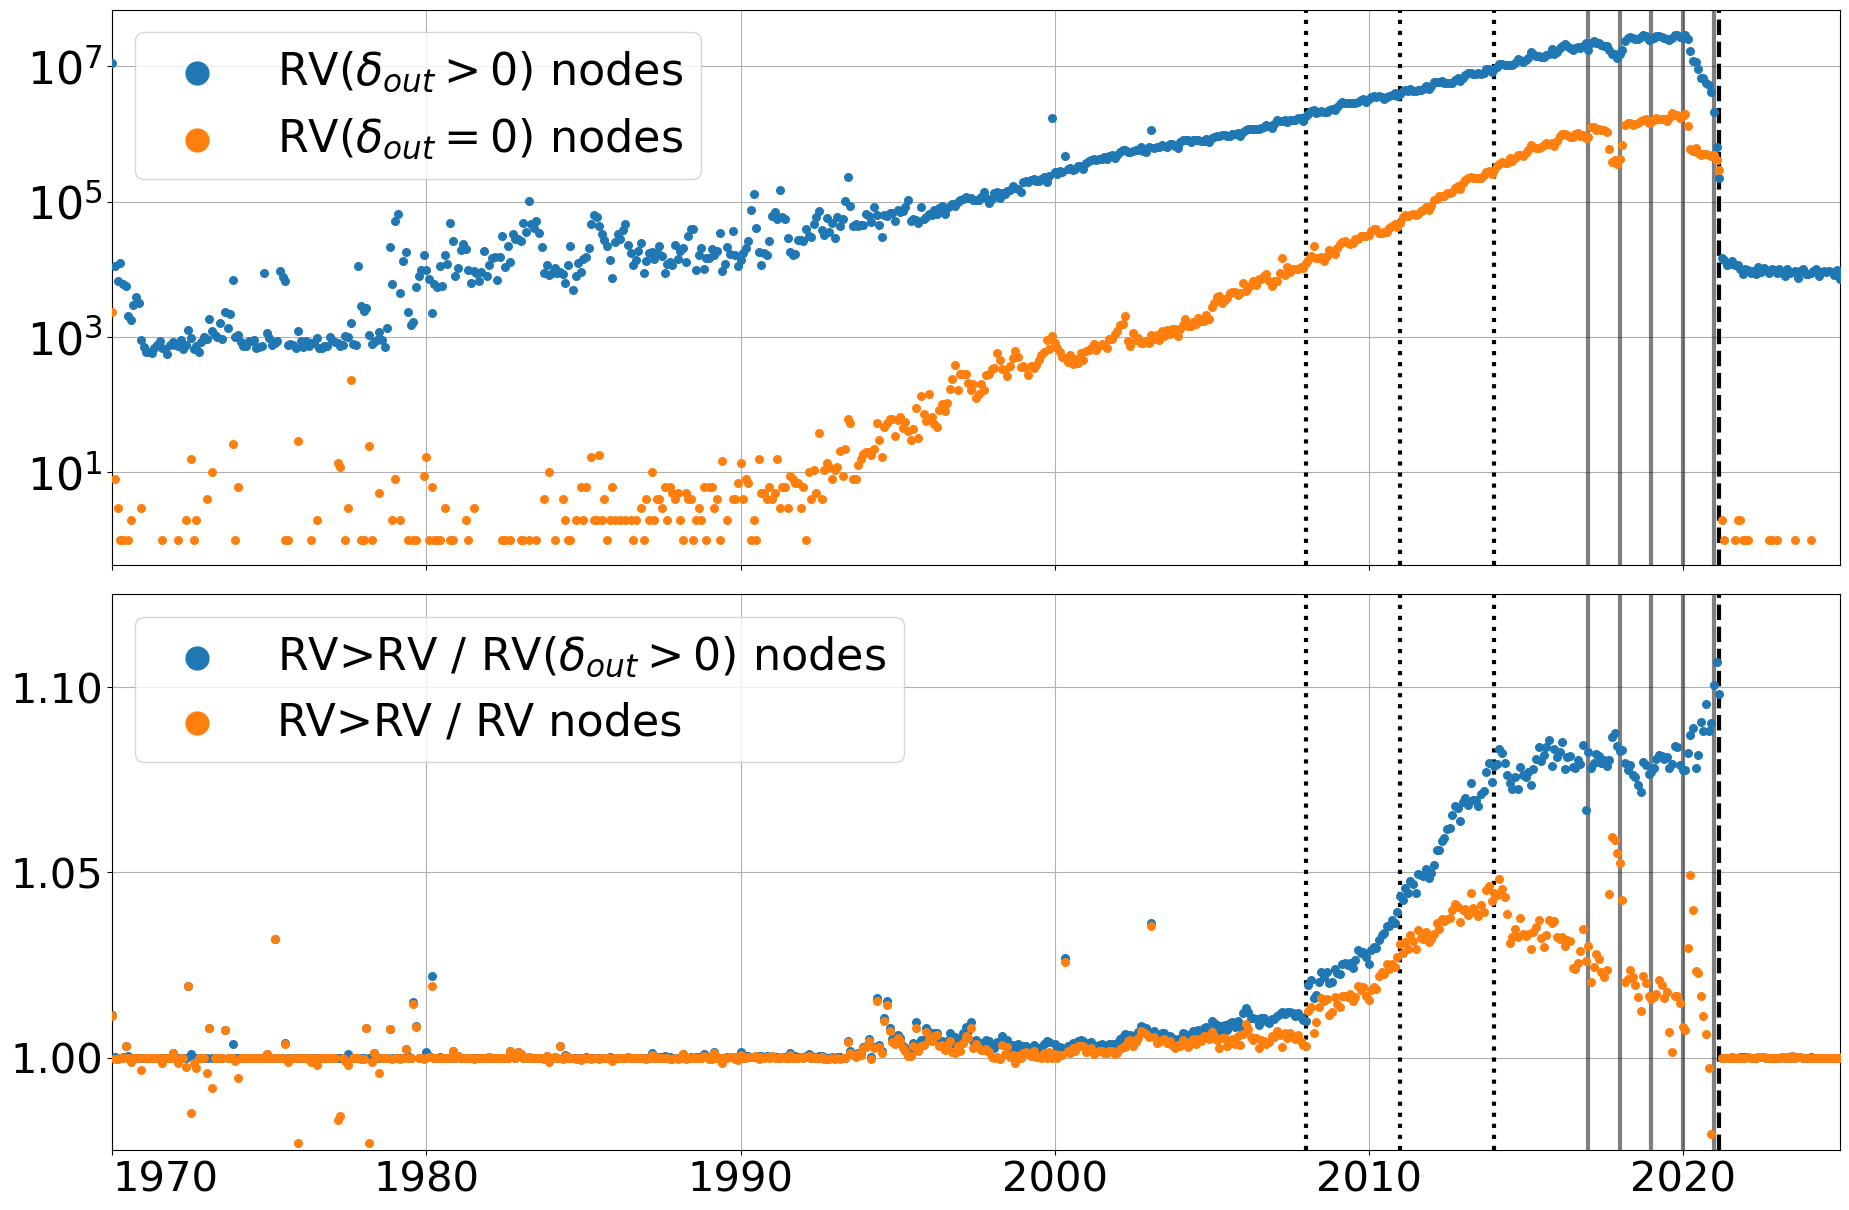

In [158]:
# python script 
# ! image is saved in exportpath

Rebuild=True
Fsave=True

if Rebuild:
    outdegree_RV_RV_month=pickle.load(open(exportpath+"outdegree_RV_RV_month_1970_2030_20240917.pkl","rb"))

    def verticalline(fig,axs):
            alpha=0.5
            lw=3
            for year in range(2017,2022):
                axs.axvline(x=year,color='k',alpha=alpha,lw=lw)
            axs.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
            for year in [2008,2011,2014]:
                axs.axvline(x=year+(1-1)/12,color='k',linestyle=':',alpha=1,lw=lw)

    def shiftlabels(fig,axs):
            xticklabels=axs.get_xticklabels()
            for i, label in enumerate(xticklabels):
                if i == 0:  
                    label.set_horizontalalignment('left')
                elif i == len(xticklabels) - 1:  
                    label.set_horizontalalignment('right')
                else:  
                    label.set_horizontalalignment('center')    

    RV_0=outdegree_RV_RV_month["nodes_dout==0"]
    RV_1plus=outdegree_RV_RV_month["nodes_dout>=1"]
    RV_RV=outdegree_RV_RV_month["edges_dout>=0"]

    datearray=1970+np.arange(1634)/12 # month since epoch to year+mont/12 (month in [0,11])

    nfig=2
    fontsize=32

    fig, axs = plt.subplots(nfig,figsize=(18,6*nfig),sharex=True)   

    plt.tight_layout()
    for i in range(nfig):
        axs[i].set_xlim(1970,2025)
        axs[i].grid()


    axs[0].scatter(datearray,RV_1plus,s=30,zorder=10,label=r'RV($\delta_{out}>0$) nodes')
    axs[0].scatter(datearray,RV_0,s=30,zorder=10,label=r'RV($\delta_{out}=0$) nodes')
    axs[0].legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=3)
    axs[0].tick_params(axis='both',which='major',labelsize=fontsize)
    axs[0].set_yscale("log") 
    verticalline(fig,axs[0])
    shiftlabels(fig,axs[0])

    axs[1].scatter(datearray,RV_RV/(RV_1plus),s=30,zorder=10,label=r'RV>RV / RV($\delta_{out}>0$) nodes')
    axs[1].scatter(datearray,RV_RV/(RV_0+RV_1plus),s=30,zorder=10,label="RV>RV / RV nodes")
    axs[1].legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=3)
    axs[1].set_ylim(0.975,1.125)
    axs[1].tick_params(axis='both',which='major',labelsize=fontsize-2)
    verticalline(fig,axs[1])
    shiftlabels(fig,axs[1])

    if Fsave:
        plt.savefig(exportpath+'/Figures/RatioRVRV_1970_2030.png', format='png', dpi=300,bbox_inches='tight')

    plt.show()

## d) In/Out Degree distribution over time (Fig. #5)

This figure was created using a python script.  

![Figure 4](./ImportData/Figures/Merge_InOutDegree_OO_RVRV_top.png)

**Caption** : Complementary cumulative distribution functions (CCDF) of outgoing degrees (LEFT) and incoming degrees (RIGHT) over time. From top to bottom, the panels correspond to: $RV > RV$ edges of the main graph; $O - O$ edges of the $O - (RV/RL) - O$ derived graph; $111 > 111$ and $111 > 101$ edges from the TSL-derived graph after $TSL$ partitioning; and, for comparison, a Barabási–Albert-like model (with two outgoing edges per new node, edges oriented according to node appearance order, and timestamps defined to mimic the exponential growth of new nodes observed in the main graph). The distributions are shown for January 1st of 2008, 2014, and 2019, using different colors.


LOAD  ./ExportData/degreeInOutHisto_TT_O-O_BigO_TSL_Month_1980_2025_20250524.pkl
dout.keys() dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])
din.keys()  dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])


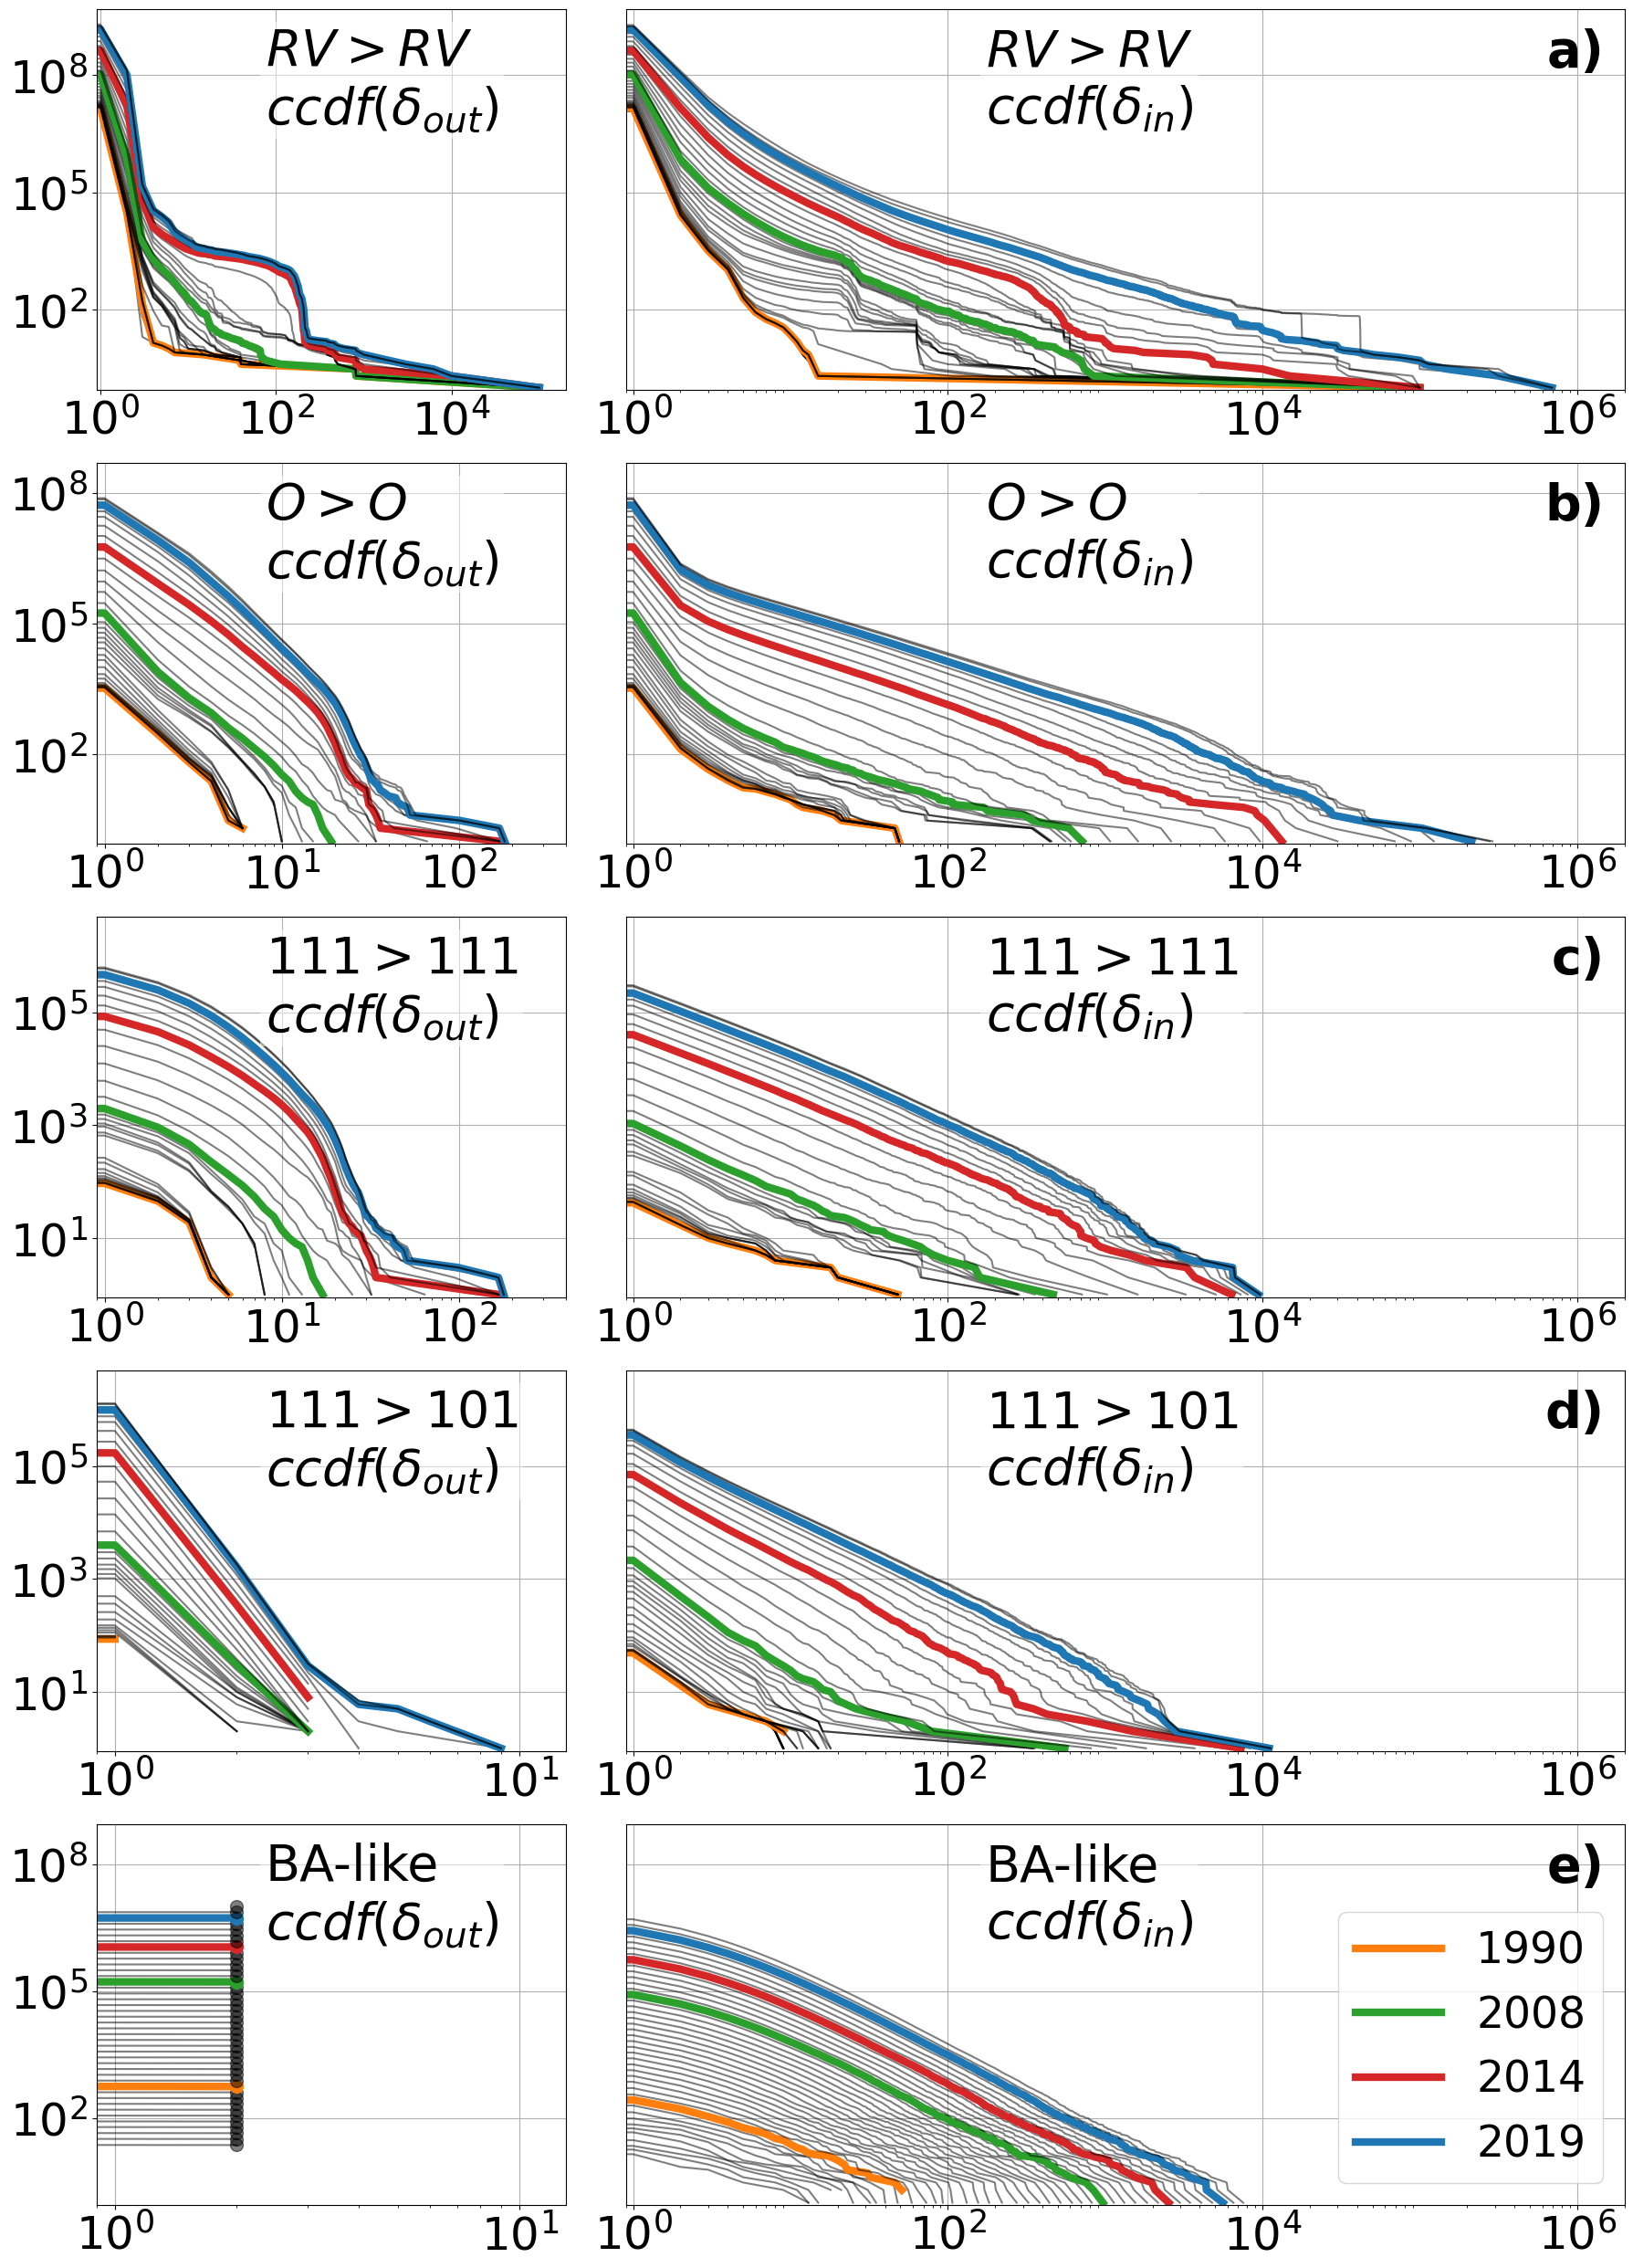

In [34]:
# python script 
# ! image is saved in exportpath

Rebuild=True
Fsave=True

if Rebuild:
    
    nfig=5
    fontsize=40


    fig = plt.figure(figsize=(18, 5*nfig))  # Taille de la figure
    ax=(nfig*2)*[None]
    ax[0] = plt.subplot2grid((nfig, 3), (0, 0), rowspan=1,colspan=1,sharey=None,sharex=None)  # 1er sous-graphique, 1/3 de la largeur
    ax[2] = plt.subplot2grid((nfig, 3), (1, 0), rowspan=1,colspan=1,sharey=None,sharex=None)  # 3e sous-graphique, 1/3 de la largeur
    ax[4] = plt.subplot2grid((nfig, 3), (2, 0), rowspan=1,colspan=1,sharey=None,sharex=None)  # 5e sous-graphique, 1/3 de la largeur
    ax[6] = plt.subplot2grid((nfig, 3), (3, 0), rowspan=1,colspan=1,sharey=None,sharex=None)  # 5e sous-graphique, 1/3 de la largeur
    ax[8] = plt.subplot2grid((nfig, 3), (4, 0), rowspan=1,colspan=1,sharey=None,sharex=None)  # 5e sous-graphique, 1/3 de la largeur

    ax[9] = plt.subplot2grid((nfig, 3), (4, 1), rowspan=1,colspan=2,sharey=ax[8])  # 6e sous-graphique, 2/3 de la largeur
    ax[7] = plt.subplot2grid((nfig, 3), (3, 1), rowspan=1,colspan=2,sharey=ax[6],sharex=ax[9])  # 6e sous-graphique, 2/3 de la largeur
    ax[5] = plt.subplot2grid((nfig, 3), (2, 1), rowspan=1,colspan=2,sharey=ax[4],sharex=ax[9])  # 6e sous-graphique, 2/3 de la largeur
    ax[3] = plt.subplot2grid((nfig, 3), (1, 1), rowspan=1,colspan=2,sharey=ax[2],sharex=ax[9])  # 4e sous-graphique, 2/3 de la largeur
    ax[1] = plt.subplot2grid((nfig, 3), (0, 1), rowspan=1,colspan=2,sharey=ax[0],sharex=ax[9])  # 2e sous-graphique, 2/3 de la largeur

    ax[0].tick_params(bottom=True, labelbottom=True,labelsize=FontSize[3])
    ax[1].tick_params(left=False, labelleft=False,bottom=True, labelbottom=True,labelsize=FontSize[3])
    ax[2].tick_params(labelsize=FontSize[3])
    ax[3].tick_params(left=False, labelleft=False,labelsize=FontSize[3])
    ax[4].tick_params(labelsize=FontSize[3])
    ax[5].tick_params(left=False, labelleft=False,labelsize=FontSize[3])
    ax[6].tick_params(labelsize=FontSize[3])
    ax[7].tick_params(left=False, labelleft=False,labelsize=FontSize[3])
    ax[8].tick_params(labelsize=FontSize[3])
    ax[9].tick_params(left=False, labelleft=False,labelsize=FontSize[3])

    for axtmp in ax:
        axtmp.grid()
        axtmp.set_yscale("log")
        axtmp.set_xscale("log")

    xmin=nfig*2*[0.9]
    
    xmax=[2e5,   2e6,
          4e2,   2e6,
          4e2,   2e6,
          1.3e1, 2e6,
          1.3e1, 2e6
         ]
    
    ymin=nfig*2*[0.9]
    
    ymax=[5e9, 5e9,
          5e8, 5e8,
          5e6, 5e6,
          5e6, 5e6,
          9e8, 9e8,
         ]

    ax[0].set_xticks([1e0,1e2,1e4])    
    ax[2].set_xticks([1e0,1e1,1e2])    
    ax[4].set_xticks([1e0,1e1,1e2])  
    ax[6].set_xticks([1e0,1e1])  
    ax[8].set_xticks([1e0,1e1])  
        
    ax[9].set_xticks([1e0,1e2,1e4,1e6])
       
    for i in range(2*nfig):
        ax[i].set_xlim(xmin[i],xmax[i])

    # position du text
    xtp=10**(np.log10(xmin)+0.36*(np.log10(xmax)-np.log10(xmin)))
    ytp=10**(np.log10(ymin)+0.7*(np.log10(ymax)-np.log10(ymin)))
    
    #xtp=10**(np.log10(xmax)-1)
    #ytp=10**(np.log10(ymax)-1)
    
    ax[0].set_ylim(ymin[0],ymax[0])
    ax[2].set_ylim(ymin[2],ymax[2])
    ax[4].set_ylim(ymin[4],ymax[4])
    ax[6].set_ylim(ymin[6],ymax[6])
    ax[8].set_ylim(ymin[8],ymax[8])


    labels = ['a)', 'b)', 'c)','d)','e)']
    for i,label in enumerate(labels):
        iax=2*i+1
        ax[iax].text(0.98, 0.95, label, transform=ax[iax].transAxes,fontsize=fontsize, fontweight='bold', va='top', ha='right') 

    
    markersize=0.5
    lw=6


    tdeltain=r'$ccdf(\delta_{in})$'
    tdeltaout=r'$ccdf(\delta_{out})$'
    
    #first line
    version="20250524"
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_year_1980_2025_"+version+".pkl","rb"))
    field,key=('ccdf',"ccdf")
    YearList=[1990,2008,2014,2019]
    ColorList=["tab:orange","tab:green","tab:red","tab:blue"]
    s="RV>RV"
    i=0;ax[i].text(xtp[i],ytp[i],r'$RV>RV$'+'\n'+tdeltaout,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    i=1;ax[i].text(xtp[i],ytp[i],r'$RV>RV$'+'\n'+tdeltain,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    for year in dout[s].keys():
        if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                ax[0].plot(dout[s][year]["x"],dout[s][year][key],markersize=markersize,c=c,lw=lw,label=str(year))
                ax[1].plot(din[s][year]["x"],din[s][year][key],markersize=markersize,c=c,lw=lw,label=str(year))
        elif year<2022:
                ax[0].plot(dout[s][year]["x"],dout[s][year][key],markersize=markersize,c="k",alpha=0.5)
                ax[1].plot(din[s][year]["x"],din[s][year][key],markersize=markersize,c="k",alpha=0.5)

    # second line

    InheritancePath="BigO"
    label="WITH Inheritance"
    version="20250524"
    filename=exportpath+"degreeInOutHisto_TT_O-O_BigO_year_1980_2025_"+version+".pkl"
    dout,din=pickle.load(open(filename,"rb"))
    field,key=('ccdf',"ccdf")
    s="O>O"
    i=2;ax[i].text(xtp[i],ytp[i],r'$O>O$'+'\n'+tdeltaout,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    i=3;ax[i].text(xtp[i],ytp[i],r'$O>O$'+'\n'+tdeltain,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

    for year in dout[s].keys():
        if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                ax[2].plot(dout[s][year]["x"],dout[s][year][key],markersize=markersize,c=c,lw=lw,label=str(year))
                ax[3].plot(din[s][year]["x"],din[s][year][key],markersize=markersize,c=c,lw=lw,label=str(year))
        elif year<2022:
                ax[2].plot(dout[s][year]["x"],dout[s][year][key],markersize=markersize,c="k",alpha=0.5)
                ax[3].plot(din[s][year]["x"],din[s][year][key],markersize=markersize,c="k",alpha=0.5)
    #ax4.legend(loc='upper right',fontsize=fontsize,ncol=1,markerscale=3)

    # third line
    
    InheritancePath="BigO"
    label="WITH Inheritance"
    version="20250524"
    filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_TSL_Month_1980_2025_"+version+".pkl"
    dout,din=pickle.load(open(filename,"rb"))
    print("LOAD ",filename)
    print("dout.keys()",dout.keys())
    print("din.keys() ",din.keys())
    field,key=('ccdf',"ccdf")
    s="111>111"
    i=4;ax[i].text(xtp[i],ytp[i],r'$111>111$'+'\n'+tdeltaout,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    i=5;ax[i].text(xtp[i],ytp[i],r'$111>111$'+'\n'+tdeltain,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

    for kmonth in dout[s].keys(): # ! month
        if kmonth%12==0: 
            year=kmonth//12
            if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                ax[4].plot(dout[s][kmonth]["x"],dout[s][kmonth][key],markersize=markersize,c=c,lw=lw,label=str(year))
                ax[5].plot(din[s][kmonth]["x"],din[s][kmonth][key],markersize=markersize,c=c,lw=lw,label=str(year))
            elif year<2022:
                ax[4].plot(dout[s][kmonth]["x"],dout[s][kmonth][key],markersize=markersize,c="k",alpha=0.5)
                ax[5].plot(din[s][kmonth]["x"],din[s][kmonth][key],markersize=markersize,c="k",alpha=0.5)

    # fourth line
    s="111>101"
    i=6;ax[i].text(xtp[i],ytp[i],r'$111>101$'+'\n'+tdeltaout,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    i=7;ax[i].text(xtp[i],ytp[i],r'$111>101$'+'\n'+tdeltain,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
                
    for kmonth in dout[s].keys(): # ! month
        if kmonth%12==0: 
            year=kmonth//12
            if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                ax[6].plot(dout[s][kmonth]["x"],dout[s][kmonth][key],markersize=markersize,c=c,lw=lw,label=str(year))
                ax[7].plot(din[s][kmonth]["x"],din[s][kmonth][key],markersize=markersize,c=c,lw=lw,label=str(year))
            elif year<2022:
                ax[6].plot(dout[s][kmonth]["x"],dout[s][kmonth][key],markersize=markersize,c="k",alpha=0.5)
                ax[7].plot(din[s][kmonth]["x"],din[s][kmonth][key],markersize=markersize,c="k",alpha=0.5)

    
    # 5th line
    version="20250524"
    filename=exportpath+"degreeInOutHisto_TT_O-O_BA_Month_1980_2025_"+version+".pkl"
    dout,din=pickle.load(open(filename,"rb"))
    field,key=('ccdf',"ccdf")
    s="O>O"
    i=8;ax[i].text(xtp[i],ytp[i],r'BA-like'+'\n'+tdeltaout,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    i=9;ax[i].text(xtp[i],ytp[i],r'BA-like'+'\n'+tdeltain,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

    for kmonth in dout[s].keys(): # ! month
        if kmonth%12==0: 
            year=kmonth//12
            if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                ax[8].plot(dout[s][kmonth]["x"],dout[s][kmonth][key],"-o",markersize=10,c=c,lw=lw,label=str(year))
                ax[9].plot(din[s][kmonth]["x"],din[s][kmonth][key],markersize=markersize,c=c,lw=lw,label=str(year))
            elif year<2022:
                ax[8].plot(dout[s][kmonth]["x"],dout[s][kmonth][key],"-o",markersize=10,c="k",alpha=0.5)
                ax[9].plot(din[s][kmonth]["x"],din[s][kmonth][key],markersize=markersize,c="k",alpha=0.5)
    ax[9].legend(loc='lower right',fontsize=fontsize-6,ncol=1,markerscale=2)
    
    plt.tight_layout()

    if Fsave:
        plt.savefig(exportpath+'/Figures/Merge_InOutDegree_OO_RVRV_top.png', format='png', dpi=300,bbox_inches='tight')
    plt.show()

    

## e) Scaling factor estimate (Fig. #7) 

This figure was created using a python script.  

![Figure 5](./ImportData/Figures/Merge_InOutDegree_OO_RVRV_bottom.png)

**Caption** : (TOP) Panel a.1 shows the ratio of new edges to new nodes over time for $RV$ nodes in the main graph,
highlighting changes in growing regime occurring in 2008, around 2011, and from 2014 onward.
The panel A.2 shows the estimated power-law exponent $\hat{e}(\delta_{in})$, computed using steps 1 and 2 described by Clauset
et al.~\cite{clauset_power-law_2009}, under the assumption that the distribution tail follows
a parametric form $DF(\delta) \propto \delta^{-e}$.
(BOTTOM) Same representations (panels b.1 and b.2) for $O$ nodes in the derived $O-(RV/RL)-O$ graph.
The degree distributions in this network appear more regular and less affected by outliers,
yielding a more robust estimate of the scaling exponent — which is meaningful only under the power-law assumption.

./ExportData/stat_nodes_edges_O-O_BigO_ORI_1970_2030_20241008.pkl


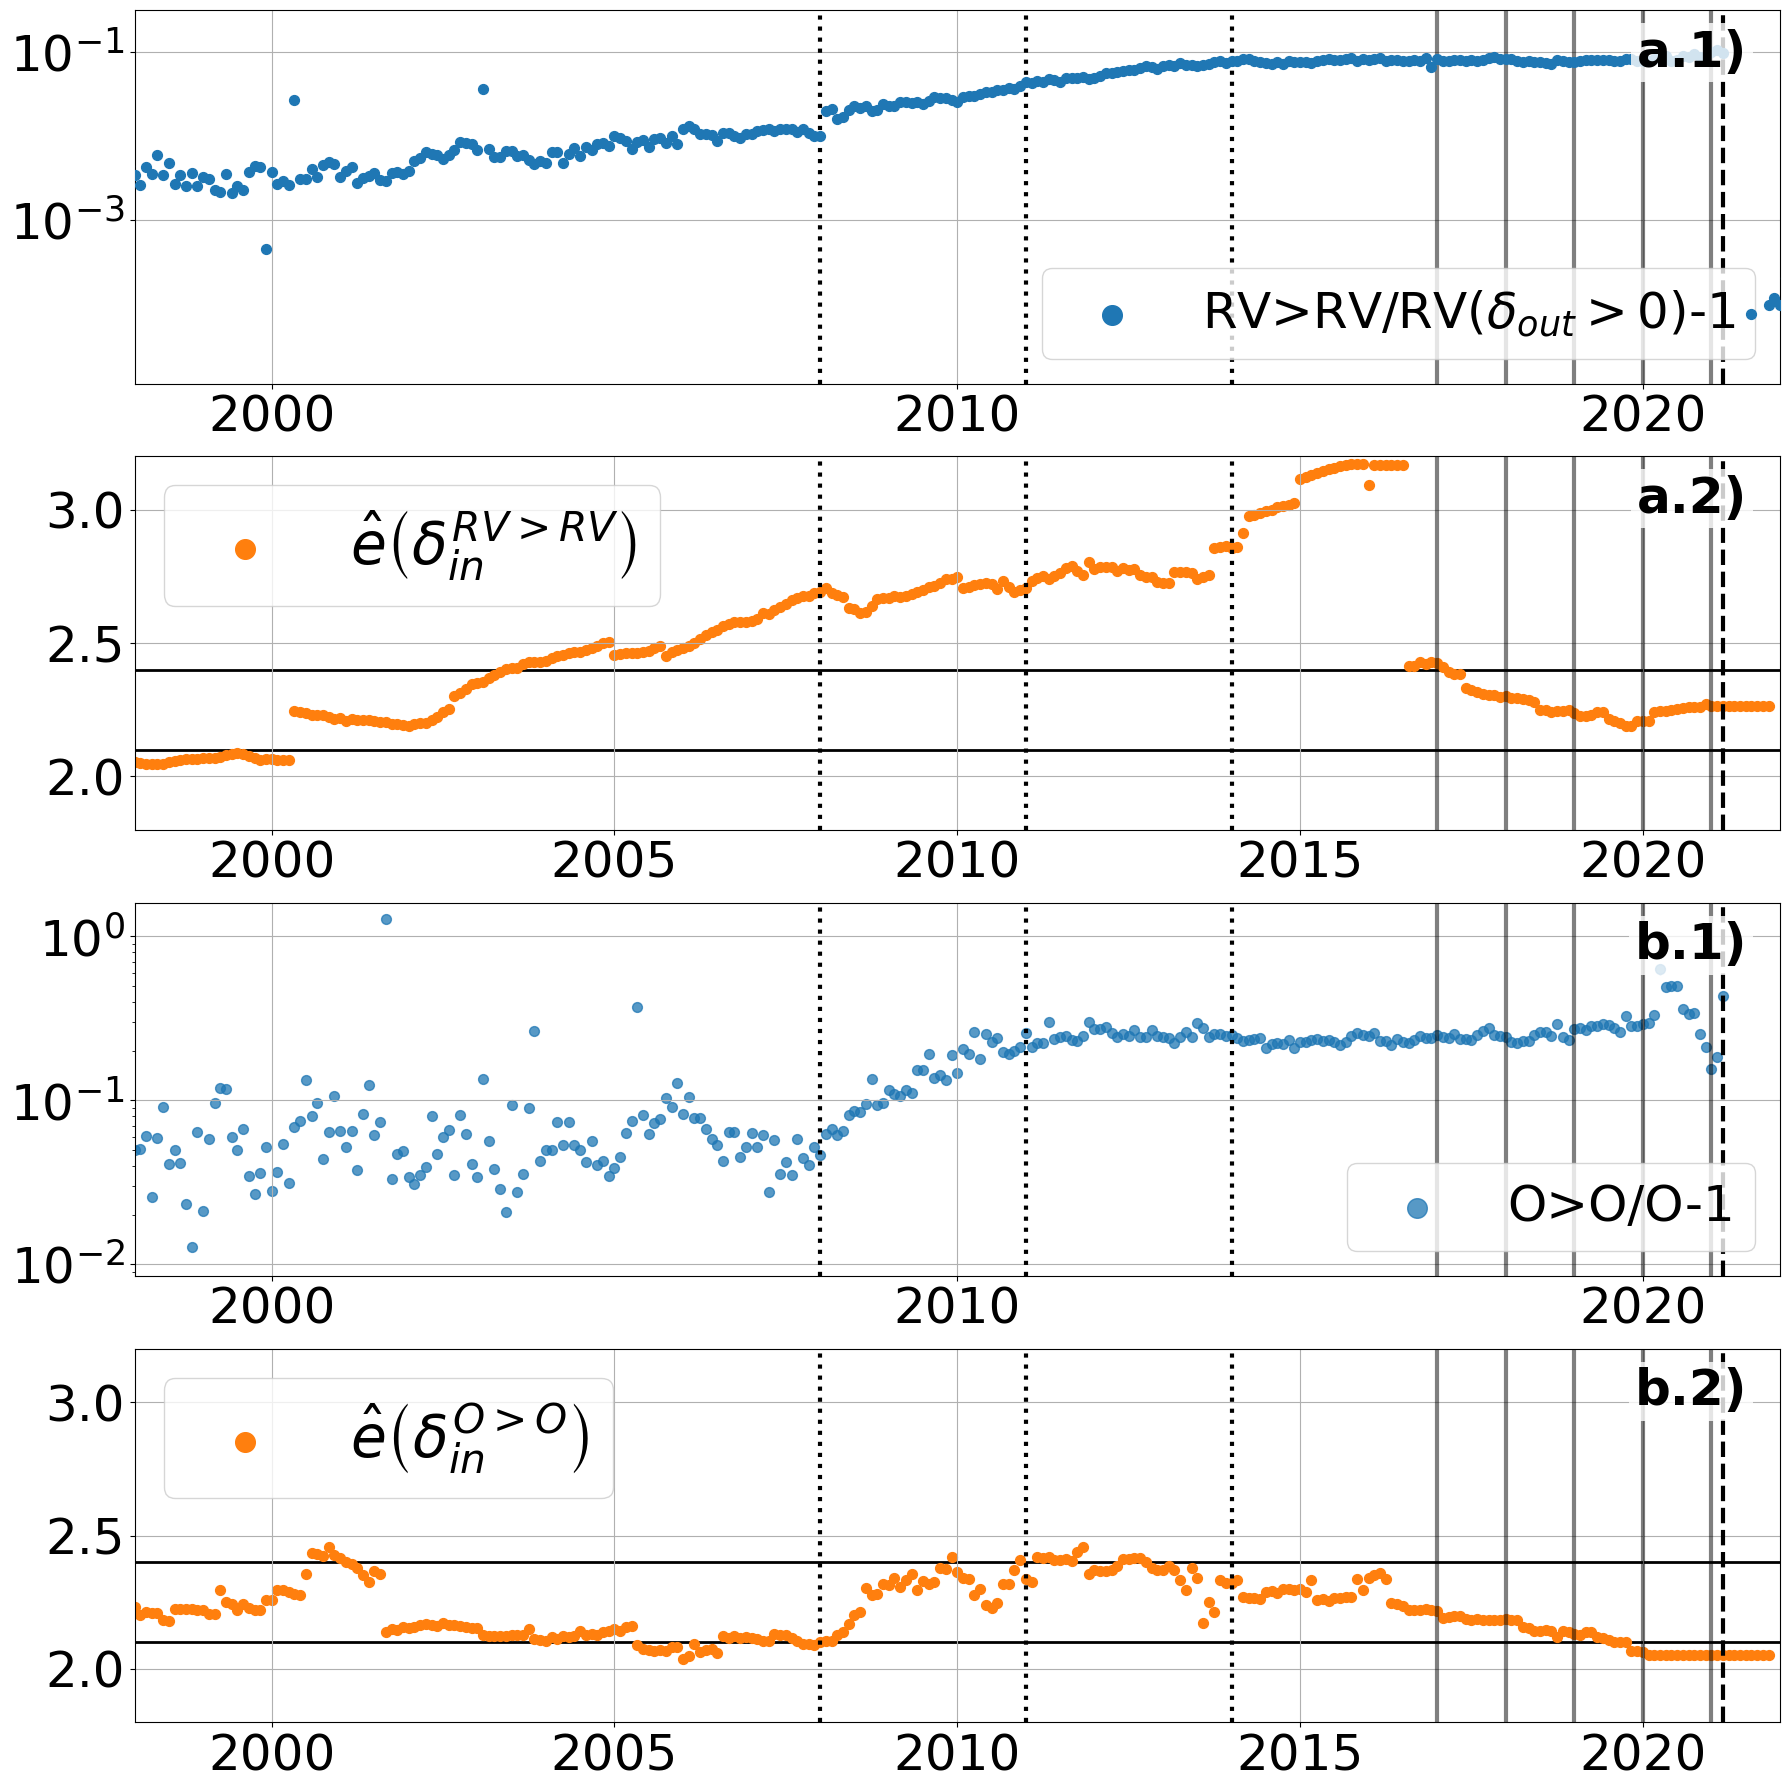

In [12]:
# python script 
# ! image is saved in exportpath

Rebuild=True
Fsave=True

if Rebuild:
    
    nfig=3
    fontsize=36

    fig = plt.figure(figsize=(18, 6*nfig))  # Taille de la figure

    ax3 = plt.subplot2grid((4, 3), (0, 0), colspan=3)
    ax4 = plt.subplot2grid((4, 3), (1, 0), colspan=3)
    ax5 = plt.subplot2grid((4, 3), (2, 0), colspan=3)
    ax6 = plt.subplot2grid((4, 3), (3, 0), colspan=3)

    ax3.set_xticks([1980,1990,2000,2010,2020])    
    ax4.set_xticks([2000,2005,2010,2015,2020])    
    ax5.set_xticks([1980,1990,2000,2010,2020])    
    ax6.set_xticks([2000,2005,2010,2015,2020])    


    
    # First line
    filename=exportpath+"stat_nodes_edges_O-O_BigO_ORI_1970_2030_20241008.pkl"
    print(filename)
    stat=pickle.load(open(filename,"rb"))
    
    # displaying all curves
    x=np.arange(1634)/12+1970
    def VerticalLinesLocal(axtmp):
        lw=3;alpha=0.5

        for year in [2017,2018,2019,2020,2021]:
            axtmp.axvline(x=year,color='k',alpha=alpha,lw=lw)
        axtmp.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        for year in [2008,2011,2014]:
            axtmp.axvline(x=year,color='k',linestyle=':',alpha=1,lw=lw)

    for key,value in stat.items():
        if np.sum(value[1:-1])!=0 and ">" in key:
            length=(len(key)-1)//2
            ax5.scatter(x,value/stat[key[-length:]]-1,s=50,label=key+"/"+key[-length:]+"-1",alpha=0.75)
            
    ax5.legend(loc='lower right',fontsize=fontsize,ncol=1,markerscale=2)
    ax5.set_yscale("log") 
    ax5.set_xlim(1998,2022)
    ax5.tick_params(axis='both',which='both',labelsize=fontsize)
    ax5.grid()

    outdegree_RV_RV_month=pickle.load(open(exportpath+"outdegree_RV_RV_month_1970_2030_20240917.pkl","rb"))
    datearray=1970+np.arange(1634)/12 
    #RV_0=outdegree_RV_RV_month["nodes_dout==0"]
    RV_1plus=outdegree_RV_RV_month["nodes_dout>=1"]
    RV_RV=outdegree_RV_RV_month["edges_dout>=0"]    
    ax3.scatter(x,(RV_RV-RV_1plus)/(RV_1plus),s=50,zorder=10,label=r'RV>RV/RV($\delta_{out}>0$)-1')
    ax3.legend(loc='lower right',fontsize=fontsize,ncol=1,markerscale=2)
    ax3.set_yscale("log")
    ax3.set_xlim(1998,2022)
    ax3.tick_params(axis='both',which='both',labelsize=fontsize)
    ax3.grid()

    VerticalLinesLocal(ax5)
    VerticalLinesLocal(ax3)
    
    # fourth line

    xdate,x_min,e_x_min,D_max,Nnodes,Nedges=pickle.load(open(exportpath+"degreeInOutHisto_TT_O-O_BigO_Month_1980_2025_20241008.weightedKS_6_SL_True.ehat.pkl","rb"))
    ax6.scatter(xdate,e_x_min,s=50,c="tab:orange",label=r'$\hat{e}\left(\delta_{in}^{O>O}\right)$')
    xdate,x_min,e_x_min,D_max,Nnodes,Nedges=pickle.load(open(exportpath+"degreeInOutHisto_TT_Month_1980_2025_20240924.weightedKS_6.ehat.pkl","rb"))
    ax4.scatter(xdate,e_x_min,s=50,c="tab:orange",label=r'$\hat{e}\left(\delta_{in}^{RV>RV}\right)$')

    ax6.set_ylim(1.8,3.2)
    ax6.set_xlim(1998,2022)
    ax6.tick_params(axis='both',which='both',labelsize=fontsize)
    ax6.legend(loc='upper left',fontsize=fontsize+6,ncol=1,markerscale=2)
    ax6.grid()
    VerticalLinesLocal(ax6)
    ax6.axhline(y=2.4,color='k',linestyle='-',alpha=1,lw=2,zorder=-10)
    ax6.axhline(y=2.1,color='k',linestyle='-',alpha=1,lw=2,zorder=-10)

    ax4.set_ylim(1.8,3.2)
    ax4.set_xlim(1998,2022)
    ax4.tick_params(axis='both',which='both',labelsize=fontsize)
    ax4.legend(loc='upper left',fontsize=fontsize+6,ncol=1,markerscale=2)
    ax4.grid()
    VerticalLinesLocal(ax4)
    ax4.axhline(y=2.4,color='k',linestyle='-',alpha=1,lw=2,zorder=-10)
    ax4.axhline(y=2.1,color='k',linestyle='-',alpha=1,lw=2,zorder=-10)

    bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)    
    ax3.text(0.98, 0.95, 'a.1)', transform=ax3.transAxes,
             fontsize=fontsize, fontweight='bold', va='top', ha='right',bbox=bbox,zorder=10) 
    ax4.text(0.98, 0.95, 'a.2)', transform=ax4.transAxes,
             fontsize=fontsize, fontweight='bold', va='top', ha='right',bbox=bbox,zorder=10) 
    ax5.text(0.98, 0.95, 'b.1)', transform=ax5.transAxes,
             fontsize=fontsize, fontweight='bold', va='top', ha='right',bbox=bbox,zorder=10) 
    ax6.text(0.98, 0.95, 'b.2)', transform=ax6.transAxes,
             fontsize=fontsize, fontweight='bold', va='top', ha='right',bbox=bbox,zorder=10) 

    plt.tight_layout()

    if Fsave:
        plt.savefig(exportpath+'/Figures/Merge_InOutDegree_OO_RVRV_bottom.png', format='png', dpi=300,bbox_inches='tight')
    plt.show()


## f) Histograms of edge timestamp differences (Fig. #6)

This figure was created using a python script. 


![Figure X](./ImportData/Figures/Merge_EdgeAges.png)

**Caption** : Histograms of the signed edge timestamp differences $\operatorname{sgn}(\Delta TS){\rm Log}_{10}(|\Delta TS|)$. From top to bottom, the panels correspond to: $RV > RV$ edges of the main graph; $O>O$ edges of the $O-(RV/RL)-O$ derived graph; $011>111$ and $111>111$ edges from the TSL-derived graph after $TSL$ partitioning; and, for comparison, a Barabási–Albert-like model (with two outgoing edges per new node, edges oriented according to node appearance order, and timestamps defined to mimic the exponential growth of new nodes observed in the main graph).


In [5]:
# python script 
# ! image is saved in exportpath

Rebuild=True
Fsave=True



In [6]:
if Rebuild:
    # O/RL/RV-RL/RV graph
    # ! can take few minutes (should be less than 10)
    arraytype,encoding,sourcearrayTS,targetarrayTS,deltaTS=GetEdgeTs(*LoadAllArray())

Loaded : ./ImportData/nodes_20240310.pkl
Loaded : ./ImportData/edges_20240310.pkl
Loaded : ./ImportData/nodesad_20240310.pkl
--------------------------------------------------------------------------------
Edge Source/Target TS Building  63.97 (s)
Mask Building  5.28 (s)
2,124,356,958 valid edges over a total of 3,841,679,043 i.e. 55.3 % of valid edges
--------------------------------------------------------------------------------
Building DeltaTS  9.32 (s)
Applying Mask  21.4 (s)
Building edge type array and applying mask 9.26 (s)
--------------------------------------------------------------------------------


In [7]:
if Rebuild:
    # Derived O-(RL/RV)-O graph
    arraytypeOO,encodingOO,sourcearrayTSOO,targetarrayTSOO,deltaTSOO=GetEdgeTs(*LoadAllArray_OO(keypath="BigO"))
    
    print('Unvalid edges are mainly orgin nodes without release or revision nodes after partitioning for which nodesad=2^32-1')
    #nodesOO,edgesOO,nodesad,d,Nnodes,Nedges
    arraytypeTSL,encodingTSL,sourcearrayTSTSL,targetarrayTSTSL,deltaTSTSL=GetEdgeTs(*LoadAllArray_OO(keypath="BigO"),depth=1)


Loaded : nodes_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : edges_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : nodesadderived_derived_O-RVRL-O_BigO_20240429.pkl
--------------------------------------------------------------------------------
Edge Source/Target TS Building  2.24 (s)
Mask Building  0.14 (s)
95,293,525 valid edges over a total of 156,682,302 i.e. 60.82 % of valid edges
--------------------------------------------------------------------------------
Building DeltaTS  1.37 (s)
Applying Mask  0.8 (s)
Building edge type array and applying mask 0.8 (s)
--------------------------------------------------------------------------------
Unvalid edges are mainly orgin nodes without release or revision nodes after partitioning for which nodesad=2^32-1
Loaded : nodes_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : edges_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : nodesadderived_derived_O-RVRL-O_BigO_20240429.pkl
-----------------------------------------------------------------------

In [8]:
if Rebuild:
    n=int(1e6) # number of nodes
    m=2 # number of new edges per new nodes
    SelfLoop=True
    nodesBA,edgesBA,NnodesBA,NedgesBA,SelfLoopBA=BarabasiAlbertGraph(n,m,Verbose=True,seed=42,SelfLoop=SelfLoop)
    dBA=SetParamsBA_d(NnodesBA)
    nodesadBA=SetParamsBA_nodesad(NnodesBA)
    arraytypeBA,encodingBA,sourcearrayTSBA,targetarrayTSBA,deltaTSBA=GetEdgeTs(nodesBA,edgesBA,nodesadBA,dBA,NnodesBA,NedgesBA)


Elapse 1.345810890197754
--------------------------------------------------------------------------------
Edge Source/Target TS Building  0.02 (s)
Mask Building  0.0 (s)
3,000,000 valid edges over a total of 3,000,000 i.e. 100.0 % of valid edges
--------------------------------------------------------------------------------
Building DeltaTS  0.01 (s)
Applying Mask  0.01 (s)
Building edge type array and applying mask 0.01 (s)
--------------------------------------------------------------------------------


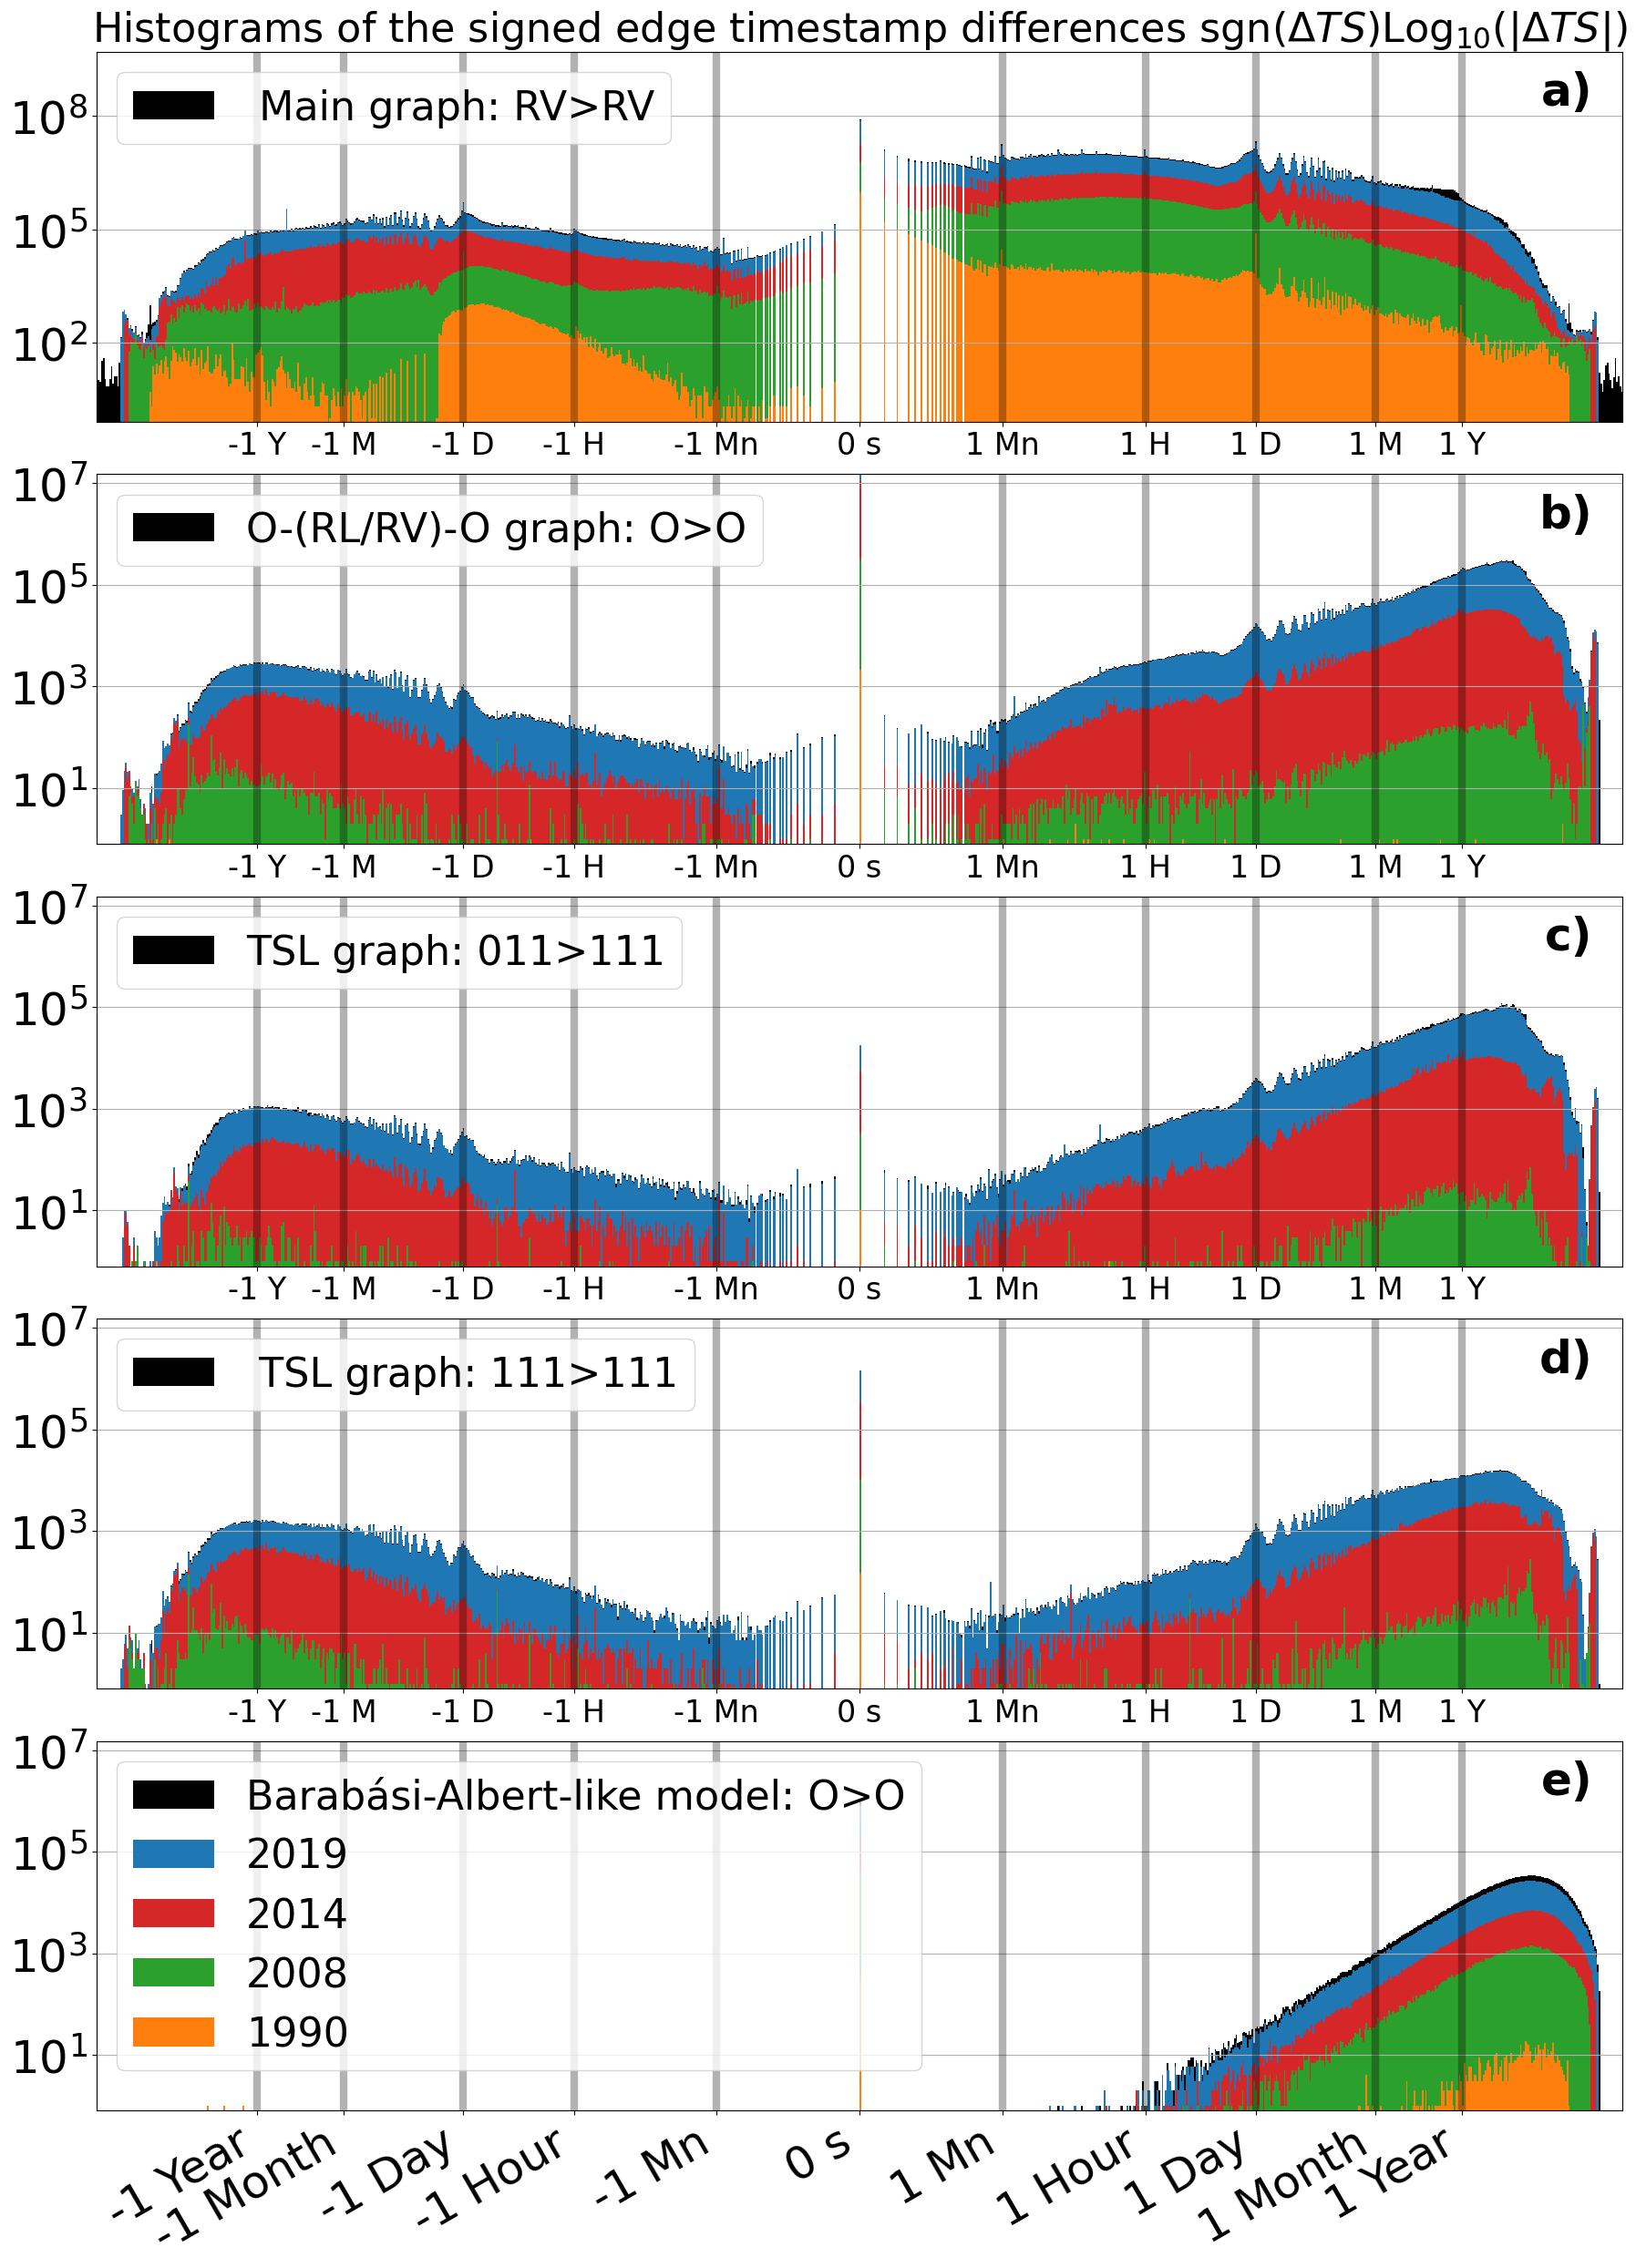

In [21]:
# python script 
# ! image is saved in exportpath
if Rebuild:
    
    nfig=5
    fontsize=36
    lw=6


    mn=60;hour=60*60;day=24*hour;week=7*day;year=365*day;month=year/12
    x=np.arange(1634)/12+1970
    
    fig = plt.figure(figsize=(18, 5*nfig))  # Taille de la figure
    string1=r'Histograms of the signed edge timestamp differences $\operatorname{sgn}(\Delta TS){\rm Log}_{10}(|\Delta TS|)$'
    #string2='Vertical black lines : -1Year/-1Week/-1Days/-1Hour/-1mn/0s/1mn/1Hour/1Day/1Week/1Year'
    #plt.title(string1+'\n'+string2,fontsize=fontsize-4)

    #plt.title("Edge Type :"+Etype+"\n ")

    
    ax=nfig*[None]

    ax[0] = plt.subplot2grid((nfig, 3), (0, 0),colspan=3)  
    ax[1] = plt.subplot2grid((nfig, 3), (1, 0),colspan=3)  
    ax[2] = plt.subplot2grid((nfig, 3), (2, 0),colspan=3)  
    ax[3] = plt.subplot2grid((nfig, 3), (3, 0),colspan=3)  
    ax[4] = plt.subplot2grid((nfig, 3), (4, 0),colspan=3)  


    ax[0].set_title(string1,fontsize=fontsize-4)

    xticks=[-np.log10(year),-np.log10(month),-np.log10(day),-np.log10(hour),-np.log10(mn),0,
            np.log10(mn),np.log10(hour),np.log10(day),np.log10(month),np.log10(year)]

    xtick_labels = ['-1 Y','-1 M','-1 D','-1 H','-1 Mn','0 s','1 Mn','1 H','1 D','1 M','1 Y']
    for i in range(nfig-1):
        ax[i].tick_params(left=True, labelleft=True,bottom=True, labelbottom=True,labelsize=fontsize)
        ax[i].set_xticks(xticks)    
        ax[i].set_xticklabels(xtick_labels,fontsize=24,ha='center')    

        
    xtick_labels = ['-1 Year','-1 Month','-1 Day','-1 Hour','-1 Mn','0 s','1 Mn','1 Hour','1 Day','1 Month','1 Year']
    ax[nfig-1].set_xticks(xticks)    
    ax[nfig-1].set_xticklabels(xtick_labels,fontsize=28,rotation=30,ha='right')    
    ax[nfig-1].tick_params(left=True, labelleft=True,bottom=True, labelbottom=True,labelsize=fontsize)

    labels = ['a)', 'b)', 'c)','d)','e)']
    for iax,label in enumerate(labels):
        ax[iax].text(0.98, 0.95, label, transform=ax[iax].transAxes,fontsize=fontsize, fontweight='bold', va='top', ha='right') 

    for axtmp in ax:
        axtmp.grid(axis='y')
        axtmp.set_yscale("log")
        #axtmp.set_xscale("log")

    xmin=nfig*[-9.5]
    xmax=nfig*[9.5]
    ymin=nfig*[0.8]
    ymax=[5e9,1.5e7,1.5e7,1.5e7,1.5e7]
    YEARlist=[(2019,"tab:blue"),(2014,"tab:red"),(2008,"tab:green"),(1990,"tab:orange")]
    YEARColorList=[]
      
    for i in range(nfig):
        ax[i].set_xlim(xmin[i],xmax[i])
        ax[i].set_ylim(ymin[i],ymax[i])
        
    for iax,encodingTmp,arraytypeTmp,targetarrayTStmp,sourcearrayTStmp,deltaTSTmp,EtypeTmp,model in [
        (0,encoding,arraytype,targetarrayTS,sourcearrayTS,deltaTS,'RV>RV',' Main graph'),
        (1,encodingOO,arraytypeOO,targetarrayTSOO,sourcearrayTSOO,deltaTSOO,'O>O','O-(RL/RV)-O graph'),
        (2,encodingTSL,arraytypeTSL,targetarrayTSTSL,sourcearrayTSTSL,deltaTSTSL,'011>111','TSL graph'),
        (3,encodingTSL,arraytypeTSL,targetarrayTSTSL,sourcearrayTSTSL,deltaTSTSL,'111>111',' TSL graph'),
        (4,encodingBA,arraytypeBA,targetarrayTSBA,sourcearrayTSBA,deltaTSBA,'O>O','Barabási-Albert-like model'),
]:
        i=np.where(np.array(encodingTmp)==EtypeTmp)[0][0]
        mask_type=arraytypeTmp==i 
        typed_deltaTS=deltaTSTmp[mask_type]
        h=np.where(typed_deltaTS==0,0,np.sign(typed_deltaTS)*np.log10(np.abs(typed_deltaTS)))
        # fixed bins and range, density=False
        ax[iax].hist(h,bins=1000,range=(-10,10),density=False,log=True,label=model+': '+EtypeTmp,alpha=1,color="k") #black
        
        # per year with the same color code as the one used for the in/out degree
        for YEAR,color in YEARlist:
            mask_type=arraytypeTmp==i         
            mask_type=np.logical_and(mask_type,np.maximum(targetarrayTStmp,sourcearrayTStmp)<=(YEAR+1-1970)*12)
            typed_deltaTS=deltaTSTmp[mask_type]
        
            h=np.where(typed_deltaTS==0,0,np.sign(typed_deltaTS)*np.log10(np.abs(typed_deltaTS)))
            if iax==4:
                ax[iax].hist(h,bins=1000,range=(-10,10),density=False,log=True,alpha=1,color=color,label=str(YEAR))
            else:
                ax[iax].hist(h,bins=1000,range=(-10,10),density=False,log=True,alpha=1,color=color)
            
        ax[iax].legend(loc="upper left",fontsize=fontsize-4,ncol=1,markerscale=1)
        # vertical line 1mn, 1H, 1D,1M,1Y
        for xv in [mn,day,hour,month,year]:
            ax[iax].axvline(x=np.log10(xv),color='k',alpha=0.3,lw=lw)
            ax[iax].axvline(x=-np.log10(xv),color='k',alpha=0.3,lw=lw)
    
    plt.tight_layout()

    if Fsave:
        plt.savefig(exportpath+'Figures/Merge_EdgeAges.png', format='png', dpi=300,bbox_inches='tight')
    plt.show()

    

## g) Bow-Tie-Like representation (Fig. #4) 

This figure was created using PowerPoint.  
The PowerPoint source file is available [here (PPT)](./Figures/ImportData/graph_dataset_bowtie_20250516.pptx).  
The image file is available [here (PNG)](./ImportData/Figures/bowtie.png).

![Figure 6](./ImportData/Figures/bowtie.png)

**Caption** : Bow-tie-like structure representation of the $O-(RV/RL)-O$ derived growing network. Edge weights take self-loops into account.